In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math

import statsmodels

ModuleNotFoundError: No module named 'statsmodels'

In [14]:
day0 = pd.read_csv('./prices_round_2_day_0.csv', sep=';')
day0.tail(5)

FileNotFoundError: [Errno 2] No such file or directory: './prices_round_2_day_0.csv'

In [12]:
print(f"ORCHIDS: {day0['ORCHIDS'].mean():.4f} ({day0['ORCHIDS'].std():.4f})")
print(f"SUNLIGHT: {day0['SUNLIGHT'].mean():.4f} ({day0['SUNLIGHT'].std():.4f})")
print(f"HUMIDITY: {day0['HUMIDITY'].mean():.4f} ({day0['HUMIDITY'].std():.4f})")

NameError: name 'day0' is not defined

In [ ]:
day0_df = day0[['ORCHIDS', 'SUNLIGHT', 'HUMIDITY', 'TRANSPORT_FEES', 'EXPORT_TARIFF', 'IMPORT_TARIFF']].corr()

day0_df

,ORCHIDS,SUNLIGHT,HUMIDITY,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF
ORCHIDS,1.000000,0.722642,0.762024,-0.392528,0.224305,0.643642
SUNLIGHT,0.722642,1.000000,0.843513,-0.012202,-0.162667,0.590216
HUMIDITY,0.762024,0.843513,1.000000,-0.233498,-0.083308,0.392039
TRANSPORT_FEES,-0.392528,-0.012202,-0.233498,1.000000,-0.117944,-0.122928
EXPORT_TARIFF,0.224305,-0.162667,-0.083308,-0.117944,1.000000,0.188685
IMPORT_TARIFF,0.643642,0.590216,0.392039,-0.122928,0.188685,1.000000


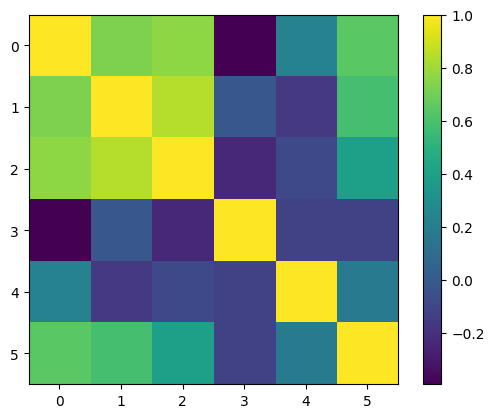

In [ ]:

plt.imshow(day0_df)
plt.colorbar()
plt.show()

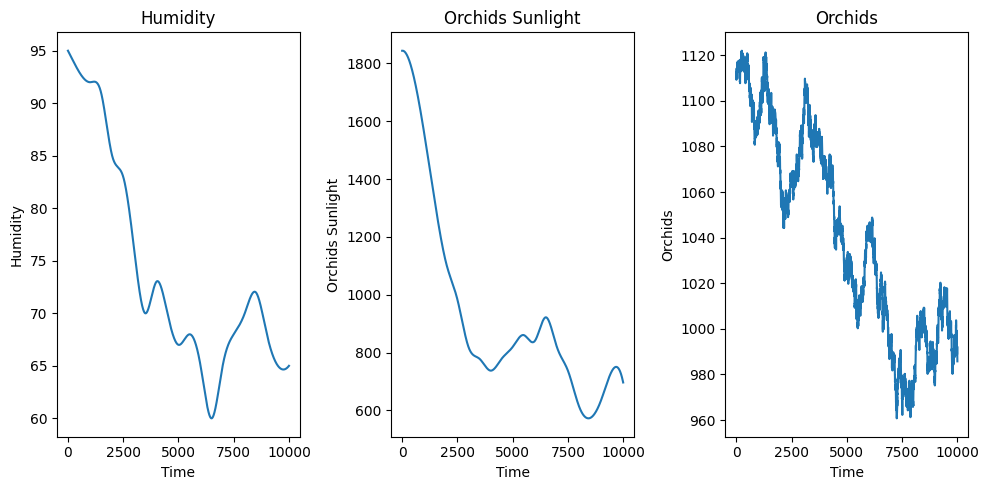

In [ ]:
orchids = day0['ORCHIDS']
sunlight = day0['SUNLIGHT']
humidity = day0['HUMIDITY']

orchids_sunlight = (np.dot(orchids, sunlight) / np.linalg.norm(sunlight)) * (sunlight / np.linalg.norm(sunlight))
orchids_humidity = (np.dot(orchids, humidity) / np.linalg.norm(humidity)) * (humidity / np.linalg.norm(humidity))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot sunlight
plt.subplot(1, 3, 1)
plt.plot(humidity)
plt.title('Humidity')
plt.xlabel('Time')
plt.ylabel('Humidity')

# Plot orchids_sunlight
plt.subplot(1, 3, 2)
plt.plot(orchids_sunlight)
plt.title('Orchids Sunlight')
plt.xlabel('Time')
plt.ylabel('Orchids Sunlight')

# Plot orchids
plt.subplot(1, 3, 3)
plt.plot(orchids)
plt.title('Orchids')
plt.xlabel('Time')
plt.ylabel('Orchids')


plt.tight_layout()
plt.show()


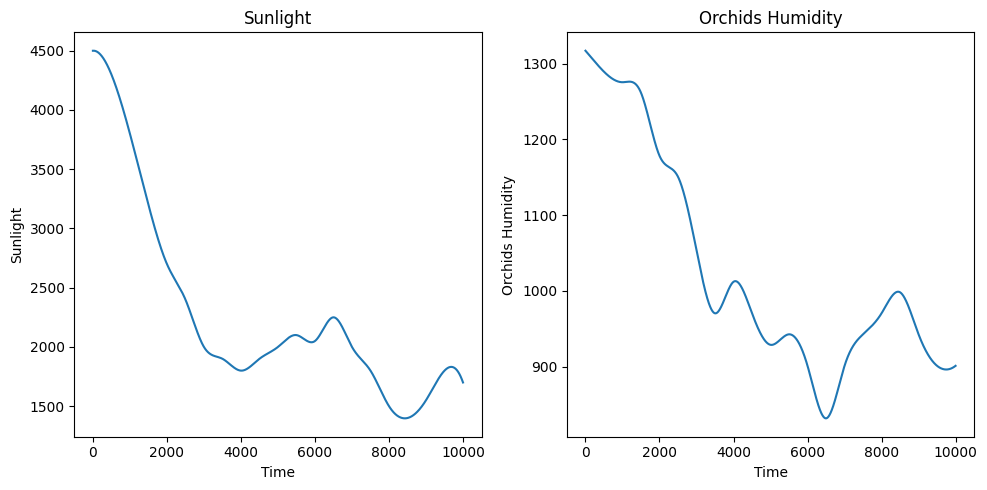

In [ ]:
plt.figure(figsize=(10, 5))

# Plot sunlight
plt.subplot(1, 2, 1)
plt.plot(sunlight)
plt.title('Sunlight')
plt.xlabel('Time')
plt.ylabel('Sunlight')

# Plot orchids_sunlight
plt.subplot(1, 2, 2)
plt.plot(orchids_humidity)
plt.title('Orchids Humidity')
plt.xlabel('Time')
plt.ylabel('Orchids Humidity')

plt.tight_layout()
plt.show()


In [ ]:
np.polyfit(sunlight,orchids_humidity,2)


NameError: name 'np' is not defined

In [ ]:
min_time = (len(sunlight)/(12))

new_sun = sunlight/min_time

np.max(new_sun)

5.3998656134386565

In [ ]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Prepare the input and output data
X = sunlight.to_numpy().reshape(-1, 1)  # Input data (sunlight)
y = orchids_humidity.to_numpy().reshape(-1, 1)    # Output data (orchid humidity)

# Fit the model to the data
model.fit(X, y)

# Predict the orchid humidity using sunlight as input
predicted_humidity = model.predict(X)

# Print the coefficients and intercept of the linear regression model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [[0.14661632]]
Intercept: [692.29399405]


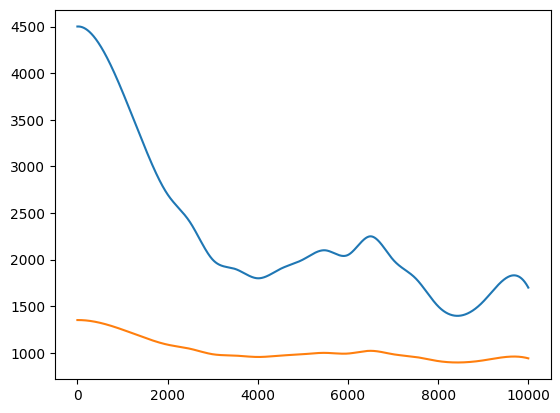

In [ ]:
plt.plot(X)
plt.plot(predicted_humidity)

In [ ]:
# Perform the ADF test
adf_results = statsmodels.tsa.stattools.adfuller(day0['ORCHIDS'])

# Print the results with labels
print('ADF Statistic (test statistic):', adf_results[0])
print('p-value:', adf_results[1])
print('Number of Lags (usedlag):', adf_results[2])
print('Number of Observations Used (nobs):', adf_results[3])
print('Critical Values:')
print(f"  1%: {adf_results[4]['1%']:.4f}")
print(f"  5%: {adf_results[4]['5%']:.4f}")
print(f" 10%: {adf_results[4]['10%']:.4f}")

# Interpretation (replace with your actual significance level)
if adf_results[1] < 0.05:
    print('The time series appears to be stationary (p-value < 0.05).')
else:
    print('The time series may be non-stationary (p-value >= 0.05).')

ADF Statistic (test statistic): -1.28245649528438
p-value: 0.637159783889354
Number of Lags (usedlag): 2
Number of Observations Used (nobs): 9998
Critical Values:
  1%: -3.4310
  5%: -2.8618
 10%: -2.5669
The time series may be non-stationary (p-value >= 0.05).


In [ ]:
adf_results[4]

{'1%': -3.431004228818807,
 '5%': -2.8618291302145686,
 '10%': -2.566923898875394}

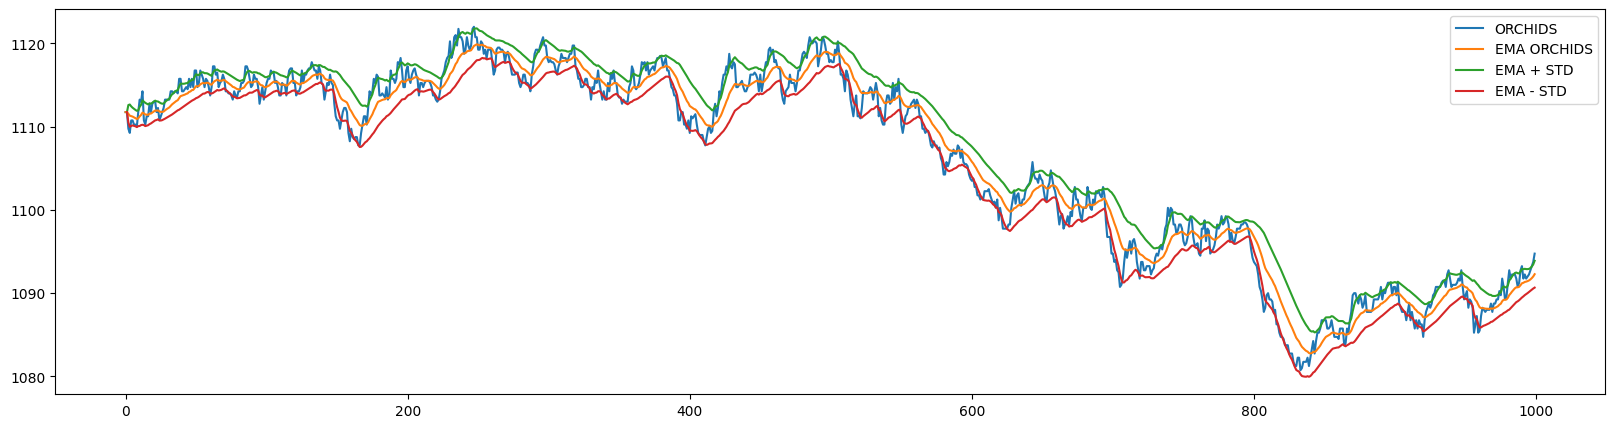

In [ ]:
ema_orchid = day0['ORCHIDS'].ewm(alpha=0.1, adjust=False).mean()[0:1000]
ema_std = day0['ORCHIDS'].ewm(alpha=0.1, adjust=False).std()[0:1000]

plt.figure(figsize=(20, 5))
plt.plot(day0['ORCHIDS'][0:1000], label='ORCHIDS')
plt.plot(ema_orchid, label='EMA ORCHIDS')
plt.plot(ema_orchid+1*ema_std, label='EMA + STD')
plt.plot(ema_orchid-1*ema_std, label='EMA - STD')
plt.legend()
plt.show()

In [ ]:
ema_orchid.to_numpy()[-1]

1092.2788165385718